In [136]:
import io
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import time 
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import seaborn as sns
from scipy.stats import uniform
from pandas_datareader import data as pdr
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



In [73]:
#Upload DATA
from google.colab import files 
uploaded = files.upload()

Saving AAL.csv to AAL (2).csv


In [74]:
AAL=pd.read_csv(io.BytesIO(uploaded['AAL.csv']))
AAL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2020-10-13,12.59,12.64,12.20,12.22,12.22,63372200
2513,2020-10-14,12.35,12.57,12.29,12.36,12.36,37647700
2514,2020-10-15,12.22,12.30,11.97,12.23,12.23,33776100
2515,2020-10-16,12.31,12.56,12.20,12.46,12.46,32717300
2516,2020-10-19,12.64,12.87,12.45,12.56,12.56,50397000


In [75]:

AAL['Date']=pd.to_datetime(AAL['Date'])
#AAL.Timestamp=pd.to_datetime(AAL.Date)
AAL.set_index('Date', inplace=True)
#AAL.index=AAL.Date
print('Number of rows and columns:',AAL.shape)
AAL.head()


Number of rows and columns: (2517, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-20,10.50,11.05,10.40,10.84,10.219318,19890000
2010-10-21,10.94,11.04,10.55,10.75,10.134469,9956400
2010-10-22,10.77,10.85,10.58,10.81,10.191037,3485500
2010-10-25,10.97,11.71,10.91,11.58,10.916947,12724300
2010-10-26,11.47,11.83,11.35,11.73,11.058357,9933800


In [76]:

AAL["Year"]=pd.DatetimeIndex(AAL.index).year 
AAL["Quaeter"]=pd.DatetimeIndex(AAL.index).quarter  
AAL["Month"]=pd.DatetimeIndex(AAL.index).month
AAL["Week"]=pd.DatetimeIndex(AAL.index).week
# AAL["Month"]=AAL.index.dt.year   pandas.Series.dt
#AAL["Week"]=AAL.Date.dt.week
#AAL['year'] = AAL.index.apply(lambda x: x.month)
#print(AAL['Year'].unique())
AAL.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week
Date,,,,,,,,,,
2020-10-13,12.59,12.64,12.20,12.22,12.22,63372200,2020,4,10,42
2020-10-14,12.35,12.57,12.29,12.36,12.36,37647700,2020,4,10,42
2020-10-15,12.22,12.30,11.97,12.23,12.23,33776100,2020,4,10,42
2020-10-16,12.31,12.56,12.20,12.46,12.46,32717300,2020,4,10,42
2020-10-19,12.64,12.87,12.45,12.56,12.56,50397000,2020,4,10,43


In [77]:
AAL2010=AAL.loc[AAL.Year==2010]
AAL2011=AAL.loc[AAL.Year==2011]
AAL2012=AAL.loc[AAL.Year==2012]
AAL2013=AAL.loc[AAL.Year==2013]
AAL2014=AAL.loc[AAL.Year==2014]
AAL2015=AAL.loc[AAL.Year==2015]
AAL2016=AAL.loc[AAL.Year==2016]
AAL2017=AAL.loc[AAL.Year==2017]
AAL2018=AAL.loc[AAL.Year==2018]
AAL2019=AAL.loc[AAL.Year==2019]
AAL2020=AAL.loc[AAL.Year==2020]
AAL2012.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week
Date,,,,,,,,,,
2012-01-03,5.20,5.22,5.07,5.12,4.826837,6105900,2012,1,1,1
2012-01-04,5.09,5.18,4.97,5.03,4.741990,5268700,2012,1,1,1
2012-01-05,5.15,5.48,5.07,5.47,5.156795,8216100,2012,1,1,1
2012-01-06,5.44,5.67,5.40,5.60,5.279352,8323000,2012,1,1,1
2012-01-09,5.56,5.80,5.55,5.72,5.392481,8029900,2012,1,1,2


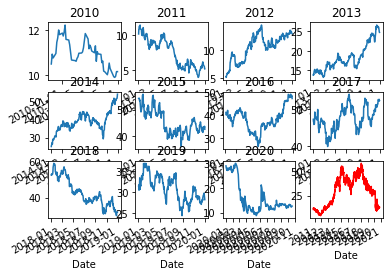

In [78]:
fig,ax=plt.subplots(3,4)
#plt.figure(figsize=(5,2))
AAL2010.Open.plot(ax=ax[0][0],title='2010')
AAL2011.Open.plot(ax=ax[0][1],title='2011')
AAL2012.Open.plot(ax=ax[0][2],title='2012')
AAL2013.Open.plot(ax=ax[0][3],title='2013')
AAL2014.Open.plot(ax=ax[1][0],title='2014')
AAL2015.Open.plot(ax=ax[1][1],title='2015')
AAL2016.Open.plot(ax=ax[1][2],title='2016')
AAL2017.Open.plot(ax=ax[1][3],title='2017')
AAL2018.Open.plot(ax=ax[2][0],title='2018')
AAL2019.Open.plot(ax=ax[2][1],title='2019')
AAL2020.Open.plot(ax=ax[2][2],title='2020')
AAL.Open.plot(color='red')

In [79]:
#AAL2011.loc[(AAL2011.Month==2) & (AAL2011.Week==3)]
AAL2011.loc[(AAL2011.Month==12)].tail(20)


,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week
Date,,,,,,,,,,
2011-12-02,5.00,5.10,4.83,4.84,4.562870,6178600,2011,4,12,48
2011-12-05,5.01,5.21,4.97,5.12,4.826837,7086700,2011,4,12,49
2011-12-06,5.09,5.28,5.01,5.25,4.949393,7783400,2011,4,12,49
2011-12-07,5.25,5.66,5.19,5.59,5.269925,10016700,2011,4,12,49
2011-12-08,5.49,5.50,5.27,5.34,5.034239,6581700,2011,4,12,49
2011-12-09,5.37,5.68,5.37,5.62,5.298207,6149000,2011,4,12,49
2011-12-12,5.46,5.81,5.43,5.63,5.307635,6370200,2011,4,12,50
2011-12-13,5.66,5.70,5.14,5.19,4.892828,8482100,2011,4,12,50
2011-12-14,5.31,5.64,5.25,5.59,5.269925,8737700,2011,4,12,50


In [80]:
#WYear_month_week
W2011_01_01=AAL2011.loc[(AAL2011['Week']==1) & (AAL2011['Month']==1)]
W2011_02_01=AAL2011.loc[(AAL2011['Week']==5) & (AAL2011['Month']==2)]
W2012_01_01=AAL2012.loc[(AAL2012['Week']==1) & (AAL2012['Month']==1)]
W2012_02_01=AAL2012.loc[(AAL2012['Week']==5) & (AAL2012['Month']==2)]
print(W2011_02_01)

            Open   High   Low  Close  ...  Year  Quaeter  Month  Week
Date                                  ...                            
2011-02-01  9.97  10.13  9.91   9.91  ...  2011        1      2     5
2011-02-02  9.90   9.90  9.51   9.52  ...  2011        1      2     5
2011-02-03  9.54   9.81  9.54   9.59  ...  2011        1      2     5
2011-02-04  9.50   9.50  9.21   9.24  ...  2011        1      2     5

[4 rows x 10 columns]


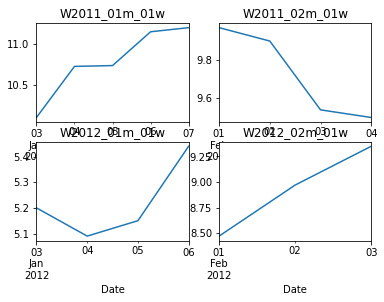

In [81]:
fig,ax=plt.subplots(2,2)
#plt.figure(figsize=(5,2))  First week of first and second months!
W2011_01_01.Open.plot(ax=ax[0][0],title='W2011_01m_01w')
W2011_02_01.Open.plot(ax=ax[0][1],title='W2011_02m_01w')
W2012_01_01.Open.plot(ax=ax[1][0],title='W2012_01m_01w')
W2012_02_01.Open.plot(ax=ax[1][1],title='W2012_02m_01w')


In [82]:
AAL.Close.head()




Date
2010-10-20    10.84
2010-10-21    10.75
2010-10-22    10.81
2010-10-25    11.58
2010-10-26    11.73
Name: Close, dtype: float64

In [83]:
# Compute the logarithmic returns using the Closing price 
AAL['LogReturn_1d']=np.log(AAL['Close'] / AAL['Close'].shift(1))

In [84]:
AAL.head()


,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week,LogReturn_1d
Date,,,,,,,,,,,
2010-10-20,10.50,11.05,10.40,10.84,10.219318,19890000,2010,4,10,42,NaN
2010-10-21,10.94,11.04,10.55,10.75,10.134469,9956400,2010,4,10,42,-0.008337
2010-10-22,10.77,10.85,10.58,10.81,10.191037,3485500,2010,4,10,42,0.005566
2010-10-25,10.97,11.71,10.91,11.58,10.916947,12724300,2010,4,10,43,0.068808
2010-10-26,11.47,11.83,11.35,11.73,11.058357,9933800,2010,4,10,43,0.012870


In [85]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [198]:
# Compute logarithmic returns using the pandas rolling mean function
AAL['LogReturn_1w']=pd.Series(AAL['LogReturn_1d']).rolling(window=5).sum()
AAL['LogReturn_2w']=pd.Series(AAL['LogReturn_1d']).rolling(window=10).sum()
AAL['LogReturn_3w']=pd.Series(AAL['LogReturn_1d']).rolling(window=15).sum()
AAL['LogReturn_4w']=pd.Series(AAL['LogReturn_1d']).rolling(window=20).sum()
AAL['LogReturn_8w']=pd.Series(AAL['LogReturn_1d']).rolling(window=40).sum()
AAL['LogReturn_12w']=pd.Series(AAL['LogReturn_1d']).rolling(window=60).sum()
AAL['LogReturn_16w']=pd.Series(AAL['LogReturn_1d']).rolling(window=80).sum()
AAL['LogReturn_20w']=pd.Series(AAL['LogReturn_1d']).rolling(window=100).sum()
AAL['LogReturn_24w']=pd.Series(AAL['LogReturn_1d']).rolling(window=120).sum()
AAL['LogReturn_28w']=pd.Series(AAL['LogReturn_1d']).rolling(window=140).sum()
AAL['LogReturn_32w']=pd.Series(AAL['LogReturn_1d']).rolling(window=160).sum()
AAL['LogReturn_36w']=pd.Series(AAL['LogReturn_1d']).rolling(window=180).sum()
AAL['LogReturn_40w']=pd.Series(AAL['LogReturn_1d']).rolling(window=200).sum()
AAL['LogReturn_44w']=pd.Series(AAL['LogReturn_1d']).rolling(window=220).sum()
AAL['LogReturn_48w']=pd.Series(AAL['LogReturn_1d']).rolling(window=240).sum()
AAL['LogReturn_52w']=pd.Series(AAL['LogReturn_1d']).rolling(window=260).sum()
AAL['LogReturn_56w']=pd.Series(AAL['LogReturn_1d']).rolling(window=280).sum()
AAL['LogReturn_60w']=pd.Series(AAL['LogReturn_1d']).rolling(window=300).sum()
AAL['LogReturn_64w']=pd.Series(AAL['LogReturn_1d']).rolling(window=320).sum()
AAL['LogReturn_68w']=pd.Series(AAL['LogReturn_1d']).rolling(window=340).sum()
AAL['LogReturn_72w']=pd.Series(AAL['LogReturn_1d']).rolling(window=360).sum()
AAL['LogReturn_76w']=pd.Series(AAL['LogReturn_1d']).rolling(window=380).sum()
AAL['LogReturn_80w']=pd.Series(AAL['LogReturn_1d']).rolling(window=400).sum()
AAL.head()

,LogReturn_1d,LogReturn_1w,LogReturn_2w,LogReturn_3w,LogReturn_4w,LogReturn_8w,LogReturn_12w,LogReturn_16w,LogReturn_20w,LogReturn_24w,LogReturn_28w,LogReturn_32w,LogReturn_36w,LogReturn_40w,LogReturn_44w,LogReturn_48w,LogReturn_52w,LogReturn_56w,LogReturn_60w,LogReturn_64w,LogReturn_68w,LogReturn_72w,LogReturn_76w,LogReturn_80w,Volume_1w,Volume_2w,Volume_3w,Volume_4w,Volume_8w,Volume_12w,Volume_16w,Volume_20w,Volume_24w,Volume_28w,Volume_32w,Volume_36w,Volume_40w,Volume_44w,Volume_48w,Volume_52w,Volume_56w,Volume_60w,Volume_64w,Volume_68w,Volume_72w,Volume_76w,Volume_80w,Vol_1w,Vol_2w,Vol_3w,Vol_4w,Vol_8w,Vol_12w,Vol_16w,Vol_20w,Vol_24w,Vol_28w,Vol_32w,Vol_36w,Vol_40w,Vol_44w,Vol_48w,Vol_52w,Vol_56w,Vol_60w,Vol_64w,Vol_68w,Vol_72w,Vol_76w,Vol_80w,Label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-22,-0.008439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9698360.0,8447950.0,8.146547e+06,8717695.0,8453612.5,8.203213e+06,8384373.75,8437798.0,8.288662e+06,7.983002e+06,7761215.625,7.846144e+06,7809232.5,7.859725e+06,7.727629e+06,7.637142e+06,7.531390e+06,7.445556e+06,7.616124e+06,7.672088e+06,7.482076e+06,7.335058e+06,7281479.00,0.119906,0.123795,0.135504,0.146757,0.231965,0.286062,0.344382,0.397656,0.449644,0.484249,0.518554,0.591918,0.645348,0.667590,0.676661,0.689709,0.700728,0.710215,0.734397,0.752103,0.760263,0.769137,0.775850,1
2012-05-23,0.035156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9641980.0,8516290.0,8.349247e+06,8366900.0,8516147.5,8.111113e+06,8316347.50,8474757.0,8.271333e+06,7.994189e+06,7750197.500,7.857091e+06,7772135.5,7.876053e+06,7.733127e+06,7.646885e+06,7.537781e+06,7.446139e+06,7.626867e+06,7.675479e+06,7.490583e+06,7.340210e+06,7274670.50,0.128211,0.127729,0.139199,0.147597,0.231406,0.283007,0.343813,0.398640,0.447771,0.482338,0.514411,0.591427,0.636887,0.668160,0.677487,0.689532,0.701166,0.709742,0.735151,0.750172,0.761036,0.769376,0.776603,1
2012-05-24,0.100257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9929860.0,9648870.0,8.721040e+06,8693330.0,8721015.0,8.221745e+06,8422833.75,8590648.0,8.317567e+06,8.059990e+06,7810993.125,7.926903e+06,7809385.0,7.928110e+06,7.784382e+06,7.699206e+06,7.583571e+06,7.476006e+06,7.665150e+06,7.704934e+06,7.527463e+06,7.376680e+06,7308670.25,0.107213,0.161480,0.165428,0.174479,0.247908,0.297996,0.356979,0.407363,0.455783,0.489434,0.522416,0.598479,0.626652,0.675250,0.684577,0.696327,0.707676,0.716624,0.741917,0.756749,0.767494,0.775864,0.783022,1
2012-05-25,0.011447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9435440.0,9643790.0,8.689340e+06,8506600.0,8775790.0,8.232123e+06,8399098.75,8613002.0,8.335589e+06,8.058169e+06,7830449.375,7.948600e+06,7802738.0,7.946947e+06,7.803074e+06,7.704798e+06,7.601341e+06,7.463336e+06,7.672137e+06,7.708110e+06,7.536929e+06,7.389398e+06,7297712.75,0.095701,0.159227,0.165137,0.169360,0.247902,0.297893,0.353663,0.407371,0.454926,0.486362,0.521645,0.598234,0.620370,0.675265,0.684615,0.694311,0.707743,0.714748,0.741762,0.756532,0.766888,0.775896,0.780086,1
2012-05-29,0.025684,0.164105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9206940.0,9601400.0,8.752513e+06,8453245.0,8786000.0,8.222038e+06,8372737.50,8631791.0,8.336097e+06,8.062842e+06,7837070.000,7.953321e+06,7780665.0,7.948853e+06,7.800267e+06,7.712457e+06,7.605320e+06,7.466218e+06,7.674572e+06,7.711046e+06,7.548136e+06,7.398808e+06,7290747.25,0.091945,0.159080,0.163538,0.169516,0.242934,0.297661,0.353739,0.406832,0.452664,0.486096,0.521062,0.597907,0.620220,0.674734,0.685013,0.694591,0.707613,0.714830,0.741881,0.755751,0.767049,0.776276,0.780401,1


In [87]:
# Compute Volumes using the pandas rolling mean function
AAL['Volume_1w']=pd.Series(AAL['Volume']).rolling(window=5).mean()
AAL['Volume_2w']=pd.Series(AAL['Volume']).rolling(window=10).mean()
AAL['Volume_3w']=pd.Series(AAL['Volume']).rolling(window=15).mean()
AAL['Volume_4w']=pd.Series(AAL['Volume']).rolling(window=20).mean()
AAL['Volume_8w']=pd.Series(AAL['Volume']).rolling(window=40).mean()
AAL['Volume_12w']=pd.Series(AAL['Volume']).rolling(window=60).mean()
AAL['Volume_16w']=pd.Series(AAL['Volume']).rolling(window=80).mean()
AAL['Volume_20w']=pd.Series(AAL['Volume']).rolling(window=100).mean()
AAL['Volume_24w']=pd.Series(AAL['Volume']).rolling(window=120).mean()
AAL['Volume_28w']=pd.Series(AAL['Volume']).rolling(window=140).mean()
AAL['Volume_32w']=pd.Series(AAL['Volume']).rolling(window=160).mean()
AAL['Volume_36w']=pd.Series(AAL['Volume']).rolling(window=180).mean()
AAL['Volume_40w']=pd.Series(AAL['Volume']).rolling(window=200).mean()
AAL['Volume_44w']=pd.Series(AAL['Volume']).rolling(window=220).mean()
AAL['Volume_48w']=pd.Series(AAL['Volume']).rolling(window=240).mean()
AAL['Volume_52w']=pd.Series(AAL['Volume']).rolling(window=260).mean()
AAL['Volume_56w']=pd.Series(AAL['Volume']).rolling(window=280).mean()
AAL['Volume_60w']=pd.Series(AAL['Volume']).rolling(window=300).mean()
AAL['Volume_64w']=pd.Series(AAL['Volume']).rolling(window=320).mean()
AAL['Volume_68w']=pd.Series(AAL['Volume']).rolling(window=340).mean()
AAL['Volume_72w']=pd.Series(AAL['Volume']).rolling(window=360).mean()
AAL['Volume_76w']=pd.Series(AAL['Volume']).rolling(window=380).mean()
AAL['Volume_80w']=pd.Series(AAL['Volume']).rolling(window=400).mean()
AAL.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week,LogReturn_1d,LogReturn_1w,LogReturn_2w,LogReturn_3w,LogReturn_4w,LogReturn_8w,LogReturn_12w,LogReturn_16w,LogReturn_20w,LogReturn_24w,LogReturn_28w,LogReturn_32w,LogReturn_36w,LogReturn_40w,LogReturn_44w,LogReturn_48w,LogReturn_52w,LogReturn_56w,LogReturn_60w,LogReturn_64w,LogReturn_68w,LogReturn_72w,LogReturn_76w,LogReturn_80w,Volume_1w,Volume_2w,Volume_3w,Volume_4w,Volume_8w,Volume_12w,Volume_16w,Volume_20w,Volume_24w,Volume_28w,Volume_32w,Volume_36w,Volume_40w,Volume_44w,Volume_48w,Volume_52w,Volume_56w,Volume_60w,Volume_64w,Volume_68w,Volume_72w,Volume_76w,Volume_80w
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-20,10.50,11.05,10.40,10.84,10.219318,19890000,2010,4,10,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-21,10.94,11.04,10.55,10.75,10.134469,9956400,2010,4,10,42,-0.008337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-22,10.77,10.85,10.58,10.81,10.191037,3485500,2010,4,10,42,0.005566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-25,10.97,11.71,10.91,11.58,10.916947,12724300,2010,4,10,43,0.068808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-26,11.47,11.83,11.35,11.73,11.058357,9933800,2010,4,10,43,0.012870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11198000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Compute Volatility using the pandas rolling standard deviation function
AAL['Vol_1w']=pd.Series(AAL['LogReturn_1d']).rolling(window=5).std()*np.sqrt(5)
AAL['Vol_2w']=pd.Series(AAL['LogReturn_1d']).rolling(window=10).std()*np.sqrt(10)
AAL['Vol_3w']=pd.Series(AAL['LogReturn_1d']).rolling(window=15).std()*np.sqrt(15)
AAL['Vol_4w']=pd.Series(AAL['LogReturn_1d']).rolling(window=20).std()*np.sqrt(20)
AAL['Vol_8w']=pd.Series(AAL['LogReturn_1d']).rolling(window=40).std()*np.sqrt(40)
AAL['Vol_12w']=pd.Series(AAL['LogReturn_1d']).rolling(window=60).std()*np.sqrt(60)
AAL['Vol_16w']=pd.Series(AAL['LogReturn_1d']).rolling(window=80).std()*np.sqrt(80)
AAL['Vol_20w']=pd.Series(AAL['LogReturn_1d']).rolling(window=100).std()*np.sqrt(100)
AAL['Vol_24w']=pd.Series(AAL['LogReturn_1d']).rolling(window=120).std()*np.sqrt(120)
AAL['Vol_28w']=pd.Series(AAL['LogReturn_1d']).rolling(window=140).std()*np.sqrt(140)
AAL['Vol_32w']=pd.Series(AAL['LogReturn_1d']).rolling(window=160).std()*np.sqrt(160)
AAL['Vol_36w']=pd.Series(AAL['LogReturn_1d']).rolling(window=180).std()*np.sqrt(180)
AAL['Vol_40w']=pd.Series(AAL['LogReturn_1d']).rolling(window=200).std()*np.sqrt(200)
AAL['Vol_44w']=pd.Series(AAL['LogReturn_1d']).rolling(window=220).std()*np.sqrt(220)
AAL['Vol_48w']=pd.Series(AAL['LogReturn_1d']).rolling(window=240).std()*np.sqrt(240)
AAL['Vol_52w']=pd.Series(AAL['LogReturn_1d']).rolling(window=260).std()*np.sqrt(260)
AAL['Vol_56w']=pd.Series(AAL['LogReturn_1d']).rolling(window=280).std()*np.sqrt(280)
AAL['Vol_60w']=pd.Series(AAL['LogReturn_1d']).rolling(window=300).std()*np.sqrt(300)
AAL['Vol_64w']=pd.Series(AAL['LogReturn_1d']).rolling(window=320).std()*np.sqrt(320)
AAL['Vol_68w']=pd.Series(AAL['LogReturn_1d']).rolling(window=340).std()*np.sqrt(340)
AAL['Vol_72w']=pd.Series(AAL['LogReturn_1d']).rolling(window=360).std()*np.sqrt(360)
AAL['Vol_76w']=pd.Series(AAL['LogReturn_1d']).rolling(window=380).std()*np.sqrt(380)
AAL['Vol_80w']=pd.Series(AAL['LogReturn_1d']).rolling(window=400).std()*np.sqrt(400)
AAL.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week,LogReturn_1d,LogReturn_1w,LogReturn_2w,LogReturn_3w,LogReturn_4w,LogReturn_8w,LogReturn_12w,LogReturn_16w,LogReturn_20w,LogReturn_24w,LogReturn_28w,LogReturn_32w,LogReturn_36w,LogReturn_40w,LogReturn_44w,LogReturn_48w,LogReturn_52w,LogReturn_56w,LogReturn_60w,LogReturn_64w,LogReturn_68w,LogReturn_72w,LogReturn_76w,LogReturn_80w,Volume_1w,Volume_2w,Volume_3w,Volume_4w,Volume_8w,Volume_12w,Volume_16w,Volume_20w,Volume_24w,Volume_28w,Volume_32w,Volume_36w,Volume_40w,Volume_44w,Volume_48w,Volume_52w,Volume_56w,Volume_60w,Volume_64w,Volume_68w,Volume_72w,Volume_76w,Volume_80w,Vol_1w,Vol_2w,Vol_3w,Vol_4w,Vol_8w,Vol_12w,Vol_16w,Vol_20w,Vol_24w,Vol_28w,Vol_32w,Vol_36w,Vol_40w,Vol_44w,Vol_48w,Vol_52w,Vol_56w,Vol_60w,Vol_64w,Vol_68w,Vol_72w,Vol_76w,Vol_80w
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-20,10.50,11.05,10.40,10.84,10.219318,19890000,2010,4,10,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-21,10.94,11.04,10.55,10.75,10.134469,9956400,2010,4,10,42,-0.008337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-22,10.77,10.85,10.58,10.81,10.191037,3485500,2010,4,10,42,0.005566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-25,10.97,11.71,10.91,11.58,10.916947,12724300,2010,4,10,43,0.068808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-26,11.47,11.83,11.35,11.73,11.058357,9933800,2010,4,10,43,0.012870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11198000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Label data: Up/Down: if the 1 month (≈ 21 trading days) logarithmic return increased/decreased)
AAL['Return_Label']=pd.Series(AAL['LogReturn_1d']).shift(-21).rolling(window=21).sum()
AAL['Label']=np.where(AAL['Return_Label'] > 0, 1, 0)

In [90]:
AAL.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Quaeter,Month,Week,LogReturn_1d,LogReturn_1w,LogReturn_2w,LogReturn_3w,LogReturn_4w,LogReturn_8w,LogReturn_12w,LogReturn_16w,LogReturn_20w,LogReturn_24w,LogReturn_28w,LogReturn_32w,LogReturn_36w,LogReturn_40w,LogReturn_44w,LogReturn_48w,LogReturn_52w,LogReturn_56w,LogReturn_60w,LogReturn_64w,LogReturn_68w,LogReturn_72w,LogReturn_76w,LogReturn_80w,Volume_1w,Volume_2w,Volume_3w,Volume_4w,Volume_8w,Volume_12w,...,Volume_24w,Volume_28w,Volume_32w,Volume_36w,Volume_40w,Volume_44w,Volume_48w,Volume_52w,Volume_56w,Volume_60w,Volume_64w,Volume_68w,Volume_72w,Volume_76w,Volume_80w,Vol_1w,Vol_2w,Vol_3w,Vol_4w,Vol_8w,Vol_12w,Vol_16w,Vol_20w,Vol_24w,Vol_28w,Vol_32w,Vol_36w,Vol_40w,Vol_44w,Vol_48w,Vol_52w,Vol_56w,Vol_60w,Vol_64w,Vol_68w,Vol_72w,Vol_76w,Vol_80w,Return_Label,Label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-20,10.50,11.05,10.40,10.84,10.219318,19890000,2010,4,10,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-10-21,10.94,11.04,10.55,10.75,10.134469,9956400,2010,4,10,42,-0.008337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-10-22,10.77,10.85,10.58,10.81,10.191037,3485500,2010,4,10,42,0.005566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-10-25,10.97,11.71,10.91,11.58,10.916947,12724300,2010,4,10,43,0.068808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-10-26,11.47,11.83,11.35,11.73,11.058357,9933800,2010,4,10,43,0.012870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11198000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [91]:
AAL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Quaeter', 'Month', 'Week', 'LogReturn_1d', 'LogReturn_1w',
       'LogReturn_2w', 'LogReturn_3w', 'LogReturn_4w', 'LogReturn_8w',
       'LogReturn_12w', 'LogReturn_16w', 'LogReturn_20w', 'LogReturn_24w',
       'LogReturn_28w', 'LogReturn_32w', 'LogReturn_36w', 'LogReturn_40w',
       'LogReturn_44w', 'LogReturn_48w', 'LogReturn_52w', 'LogReturn_56w',
       'LogReturn_60w', 'LogReturn_64w', 'LogReturn_68w', 'LogReturn_72w',
       'LogReturn_76w', 'LogReturn_80w', 'Volume_1w', 'Volume_2w', 'Volume_3w',
       'Volume_4w', 'Volume_8w', 'Volume_12w', 'Volume_16w', 'Volume_20w',
       'Volume_24w', 'Volume_28w', 'Volume_32w', 'Volume_36w', 'Volume_40w',
       'Volume_44w', 'Volume_48w', 'Volume_52w', 'Volume_56w', 'Volume_60w',
       'Volume_64w', 'Volume_68w', 'Volume_72w', 'Volume_76w', 'Volume_80w',
       'Vol_1w', 'Vol_2w', 'Vol_3w', 'Vol_4w', 'Vol_8w', 'Vol_12w', 'Vol_16w',
       'Vol_20w', 'Vol_24w'

In [92]:
# Drop NA´s
AAL=AAL.dropna("index")
AAL=AAL.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Year' ,'Month','Week','Quaeter',"Return_Label"], axis=1)

In [93]:
AAL.columns

Index(['LogReturn_1d', 'LogReturn_1w', 'LogReturn_2w', 'LogReturn_3w',
       'LogReturn_4w', 'LogReturn_8w', 'LogReturn_12w', 'LogReturn_16w',
       'LogReturn_20w', 'LogReturn_24w', 'LogReturn_28w', 'LogReturn_32w',
       'LogReturn_36w', 'LogReturn_40w', 'LogReturn_44w', 'LogReturn_48w',
       'LogReturn_52w', 'LogReturn_56w', 'LogReturn_60w', 'LogReturn_64w',
       'LogReturn_68w', 'LogReturn_72w', 'LogReturn_76w', 'LogReturn_80w',
       'Volume_1w', 'Volume_2w', 'Volume_3w', 'Volume_4w', 'Volume_8w',
       'Volume_12w', 'Volume_16w', 'Volume_20w', 'Volume_24w', 'Volume_28w',
       'Volume_32w', 'Volume_36w', 'Volume_40w', 'Volume_44w', 'Volume_48w',
       'Volume_52w', 'Volume_56w', 'Volume_60w', 'Volume_64w', 'Volume_68w',
       'Volume_72w', 'Volume_76w', 'Volume_80w', 'Vol_1w', 'Vol_2w', 'Vol_3w',
       'Vol_4w', 'Vol_8w', 'Vol_12w', 'Vol_16w', 'Vol_20w', 'Vol_24w',
       'Vol_28w', 'Vol_32w', 'Vol_36w', 'Vol_40w', 'Vol_44w', 'Vol_48w',
       'Vol_52w', 'Vol_56w', '

In [94]:
print(AAL.shape)

(2096, 71)


In [95]:
print(AAL.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2096 entries, 2012-05-22 to 2020-09-18
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LogReturn_1d   2096 non-null   float64
 1   LogReturn_1w   2096 non-null   float64
 2   LogReturn_2w   2096 non-null   float64
 3   LogReturn_3w   2096 non-null   float64
 4   LogReturn_4w   2096 non-null   float64
 5   LogReturn_8w   2096 non-null   float64
 6   LogReturn_12w  2096 non-null   float64
 7   LogReturn_16w  2096 non-null   float64
 8   LogReturn_20w  2096 non-null   float64
 9   LogReturn_24w  2096 non-null   float64
 10  LogReturn_28w  2096 non-null   float64
 11  LogReturn_32w  2096 non-null   float64
 12  LogReturn_36w  2096 non-null   float64
 13  LogReturn_40w  2096 non-null   float64
 14  LogReturn_44w  2096 non-null   float64
 15  LogReturn_48w  2096 non-null   float64
 16  LogReturn_52w  2096 non-null   float64
 17  LogReturn_56w  2096 non-null   flo

In [96]:
print("Non-NA:");print(AAL.count())

Non-NA:
LogReturn_1d     2096
LogReturn_1w     2096
LogReturn_2w     2096
LogReturn_3w     2096
LogReturn_4w     2096
LogReturn_8w     2096
LogReturn_12w    2096
LogReturn_16w    2096
LogReturn_20w    2096
LogReturn_24w    2096
LogReturn_28w    2096
LogReturn_32w    2096
LogReturn_36w    2096
LogReturn_40w    2096
LogReturn_44w    2096
LogReturn_48w    2096
LogReturn_52w    2096
LogReturn_56w    2096
LogReturn_60w    2096
LogReturn_64w    2096
LogReturn_68w    2096
LogReturn_72w    2096
LogReturn_76w    2096
LogReturn_80w    2096
Volume_1w        2096
Volume_2w        2096
Volume_3w        2096
Volume_4w        2096
Volume_8w        2096
Volume_12w       2096
Volume_16w       2096
Volume_20w       2096
Volume_24w       2096
Volume_28w       2096
Volume_32w       2096
Volume_36w       2096
Volume_40w       2096
Volume_44w       2096
Volume_48w       2096
Volume_52w       2096
Volume_56w       2096
Volume_60w       2096
Volume_64w       2096
Volume_68w       2096
Volume_72w       2096
Vo

In [97]:
print("Summary statistics:");print(AAL.describe())

Summary statistics:
       LogReturn_1d  LogReturn_1w  ...      Vol_80w        Label
count   2096.000000   2096.000000  ...  2096.000000  2096.000000
mean       0.000099      0.000552  ...     0.537257     0.537691
std        0.030927      0.071817  ...     0.151836     0.498696
min       -0.290682     -0.442543  ...     0.366846     0.000000
25%       -0.013207     -0.034161  ...     0.448520     0.000000
50%        0.000616      0.002124  ...     0.484353     1.000000
75%        0.014726      0.038336  ...     0.546258     1.000000
max        0.344278      0.603268  ...     1.006696     1.000000

[8 rows x 71 columns]


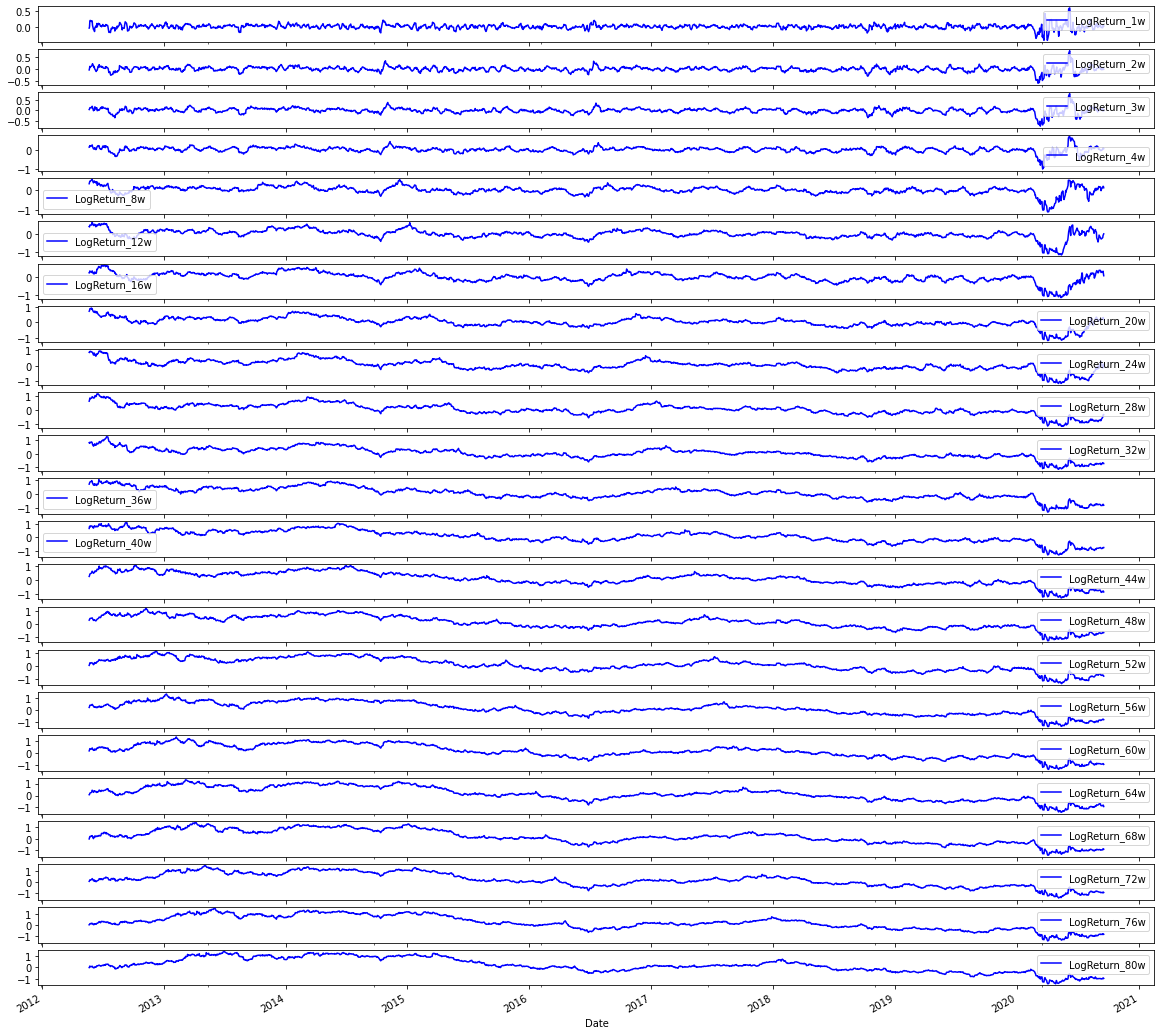

In [98]:
# Plot the logarithmic returns
AAL.iloc[:,1:24].plot(subplots=True, color='blue', figsize=(20, 20));

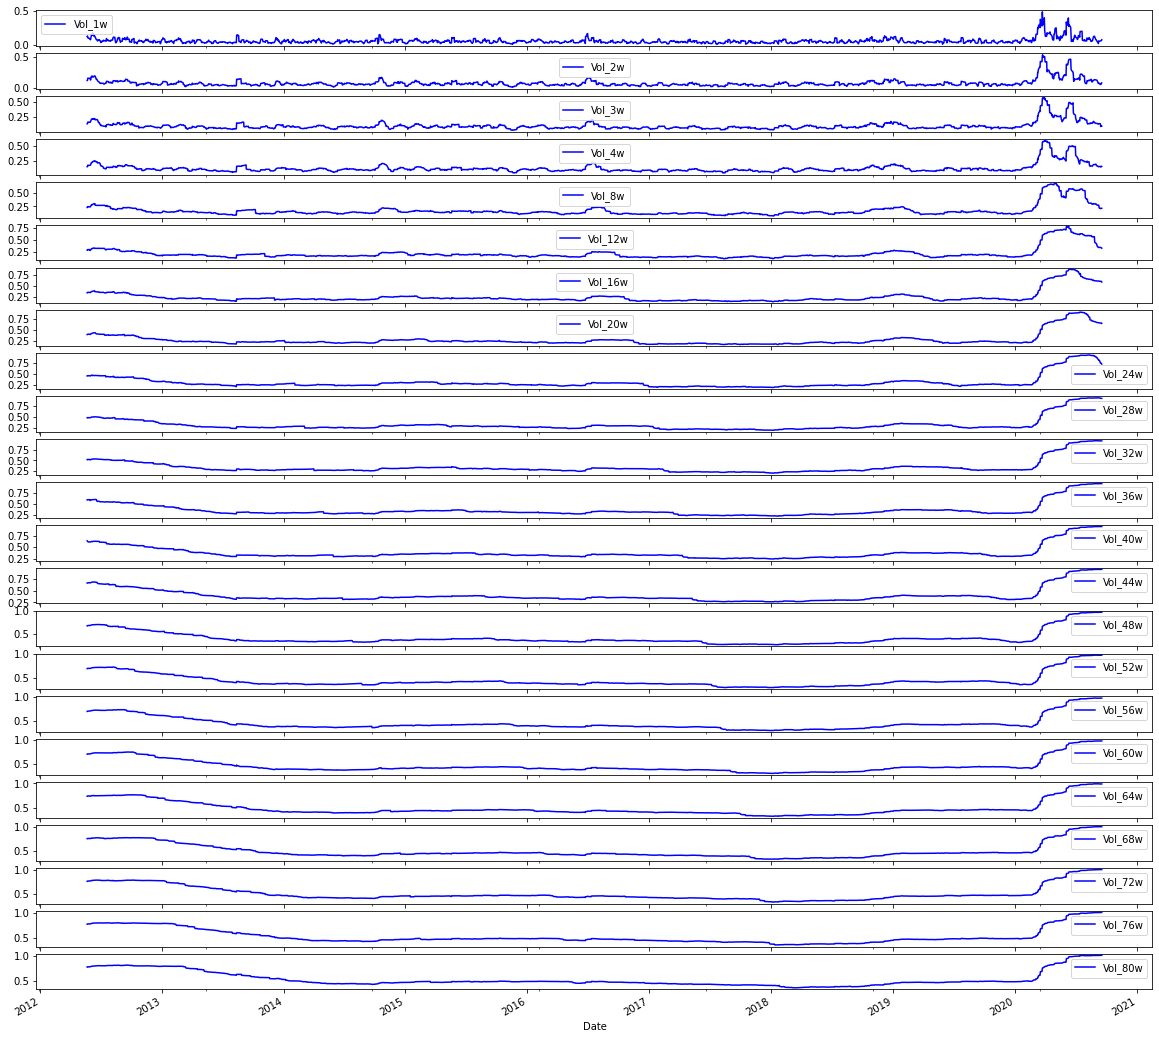

In [99]:
# Plot the Volumes
AAL.iloc[:,47:70].plot(subplots=True, color='blue', figsize=(20, 20));

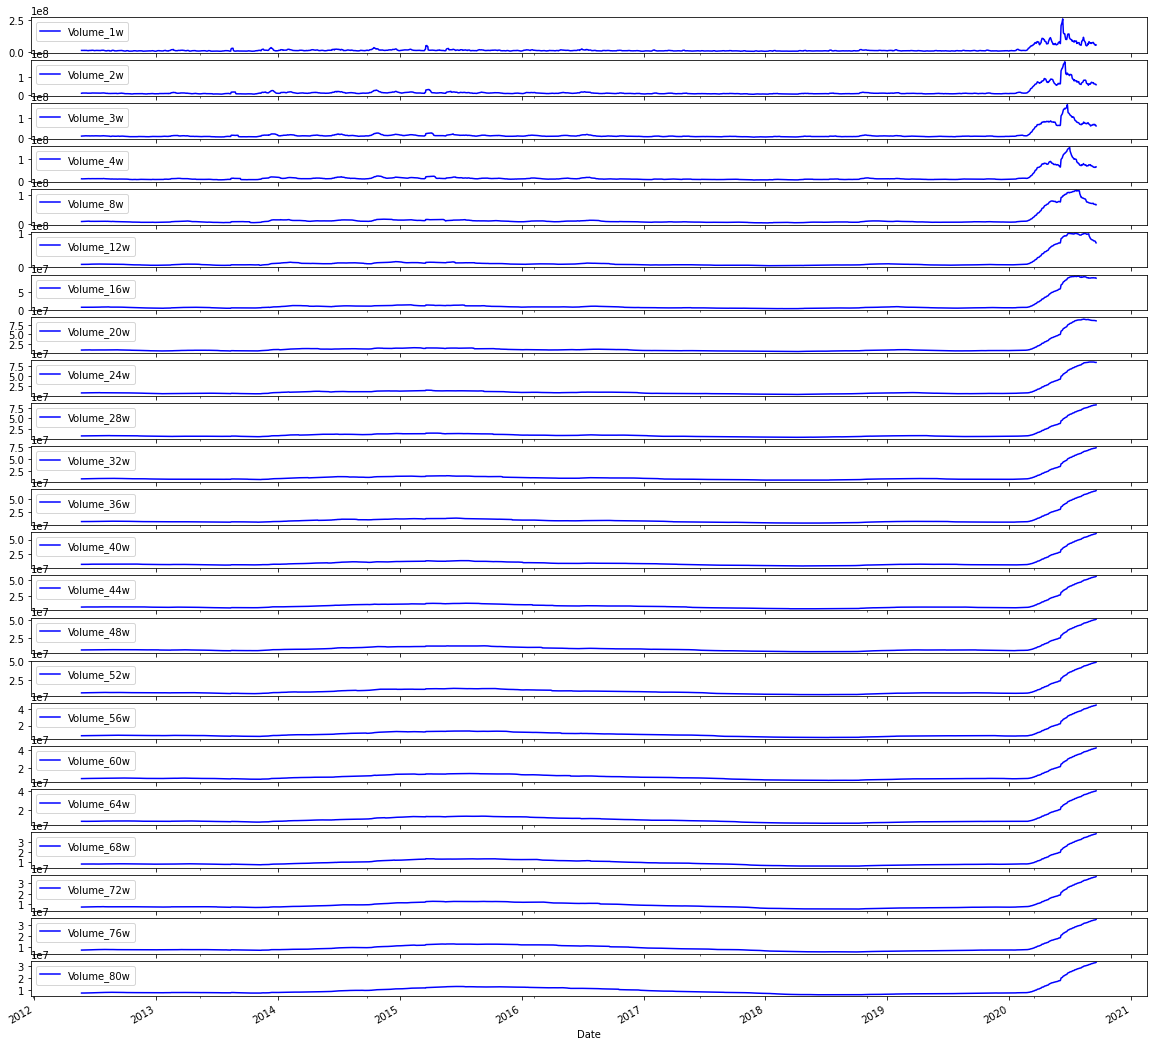

In [100]:
# Plot the Volatilities
AAL.iloc[:,24:47].plot(subplots=True, color='blue',figsize=(20, 20));

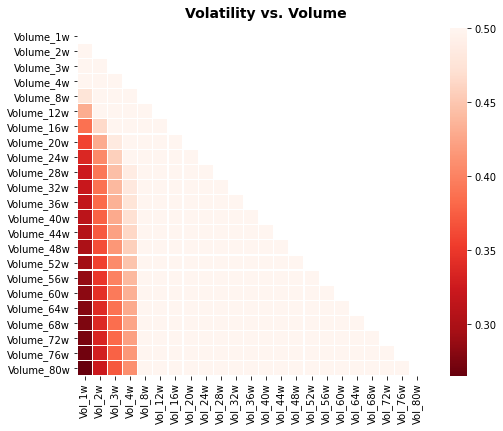

In [113]:
# Plot correlation matrix

cols2447=AAL.iloc[:,47:70].columns 

corr=AAL.iloc[:,24:70].corr().filter(cols2447).drop(cols2447)

mask=np.zeros_like(corr)

mask[np.triu_indices_from(mask)]=True 

heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))

heat=sns.heatmap(corr,ax=ax,mask=mask, vmax=.5, square=True, linewidths=.2, cmap="Reds_r")

heat_fig.subplots_adjust(top=.93)

heat_fig.suptitle('Volatility vs. Volume', fontsize=14, fontweight='bold')

plt.savefig('heatVolatilVSVolu.eps', dpi=200, format='eps');

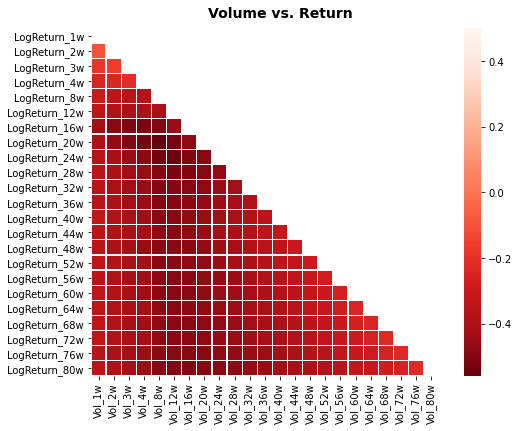

In [105]:
# Plot correlation matrix(Volumes)

cols47_70=AAL.iloc[:,47:70].columns 

corr=AAL.iloc[:, np.r_[1:24, 47:70]].corr().filter(cols47_70).drop(cols47_70)

mask=np.zeros_like(corr); mask[np.triu_indices_from(mask)]=True 

heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))

heat=sns.heatmap(corr,ax=ax, mask=mask, vmax=.5, square=True, linewidths=.2, cmap="Reds_r")

heat_fig.subplots_adjust(top=.93)

heat_fig.suptitle('Volume vs. Return', fontsize=14, fontweight='bold')

plt.savefig('heat_VolVSRet.eps', dpi=200, format='eps');

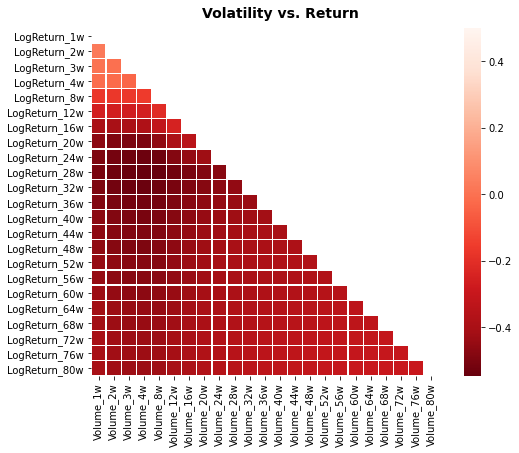

In [67]:
# Plot correlation matrix(Volatility)

cols24_47=AAL.iloc[:,24:47].columns 

corr=AAL.iloc[:,1:47].corr().filter(cols24_47).drop(cols24_47)

mask=np.zeros_like(corr); mask[np.triu_indices_from(mask)]=True 

heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))

heat=sns.heatmap(corr,ax=ax, mask=mask, vmax=.5, square=True, linewidths=.2, cmap="Reds_r")

heat_fig.subplots_adjust(top=.93)

heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold')

plt.savefig('heat_VolatilityVSRet.eps', dpi=200, format='eps');

In [126]:
# Baseline(Set 1, Volatility)
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(AAL.iloc[:,24:47], AAL.iloc[:,70], test_size=0.15 ,shuffle=False, stratify=None)
print(X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_1_lstm=X_train_1.values.reshape(X_train_1.shape[0], 1, X_train_1.shape[1])
X_test_1_lstm=X_test_1.values.reshape(X_test_1.shape[0], 1, X_test_1.shape[1])
print(X_train_1_lstm.shape)
print(X_test_1_lstm.shape)

(1781, 23) (315, 23) (1781,) (315,)
(1781, 1, 23)
(315, 1, 23)


In [127]:
#Set 2, Return
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(AAL.iloc[:,1:24], AAL.iloc[:,70], test_size=0.15 ,shuffle=False, stratify=None)
print(X_train_2.shape,X_test_2.shape,y_train_2.shape,y_test_2.shape)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_2_lstm=X_train_2.values.reshape(X_train_2.shape[0], 1, X_train_2.shape[1])
X_test_2_lstm=X_test_2.values.reshape(X_test_2.shape[0], 1, X_test_2.shape[1])
print(X_train_2_lstm.shape)
print(X_test_2_lstm.shape)

(1781, 23) (315, 23) (1781,) (315,)
(1781, 1, 23)
(315, 1, 23)


In [128]:
#Set 3, Volume
X_train_3, X_test_3, y_train_3, y_test_3=train_test_split(AAL.iloc[:,47:70], AAL.iloc[:,70], test_size=0.15 ,shuffle=False, stratify=None)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_3_lstm=X_train_3.values.reshape(X_train_3.shape[0], 1, X_train_3.shape[1])
X_test_3_lstm=X_test_3.values.reshape(X_test_3.shape[0], 1, X_test_3.shape[1])
print(X_train_3_lstm.shape)
print(X_test_3_lstm.shape)

(1781, 1, 23)
(315, 1, 23)


In [129]:
#Set 4, Volatility and Return
X_train_4, X_test_4, y_train_4, y_test_4=train_test_split(AAL.iloc[:,1:47], AAL.iloc[:,70], test_size=0.15 ,shuffle=False, stratify=None)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_4_lstm=X_train_4.values.reshape(X_train_4.shape[0], 1, X_train_4.shape[1])
X_test_4_lstm=X_test_4.values.reshape(X_test_4.shape[0], 1, X_test_4.shape[1])
print(X_train_4_lstm.shape)
print(X_test_4_lstm.shape)

(1781, 1, 46)
(315, 1, 46)


In [130]:
# Set 5, Volatility and Volume
X_train_5, X_test_5, y_train_5, y_test_5=train_test_split(AAL.iloc[:,24:70], AAL.iloc[:,70], test_size=0.1 ,shuffle=False, stratify=None)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_5_lstm=X_train_5.values.reshape(X_train_5.shape[0], 1, X_train_5.shape[1])
X_test_5_lstm=X_test_5.values.reshape(X_test_5.shape[0], 1, X_test_5.shape[1])
print(X_train_5_lstm.shape)
print(X_test_5_lstm.shape)

(1886, 1, 46)
(210, 1, 46)


In [132]:
#Set 6, Return and Volume
X_train_6, X_test_6, y_train_6, y_test_6=train_test_split(pd.concat([AAL.iloc[:,1:24], AAL.iloc[:,47:70]], axis=1), AAL.iloc[:,70], test_size=0.1 ,shuffle=False, stratify=None)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_6_lstm=X_train_6.values.reshape(X_train_6.shape[0], 1, X_train_6.shape[1])
X_test_6_lstm=X_test_6.values.reshape(X_test_6.shape[0], 1, X_test_6.shape[1])
print(X_train_6_lstm.shape)
print(X_test_6_lstm.shape)


(1886, 1, 46)
(210, 1, 46)


In [133]:
#Set 7: Volatility, Return and Volume
X_train_7, X_test_7, y_train_7, y_test_7=train_test_split(AAL.iloc[:,1:70], AAL.iloc[:,70], test_size=0.1 ,shuffle=False, stratify=None)
# Input arrays shaped: (samples or batch, time_steps or look_back, num_features):
X_train_7_lstm=X_train_7.values.reshape(X_train_7.shape[0], 1, X_train_7.shape[1])
X_test_7_lstm=X_test_7.values.reshape(X_test_7.shape[0], 1, X_test_7.shape[1])
print(X_train_7_lstm.shape)
print(X_test_7_lstm.shape)

(1886, 1, 69)
(210, 1, 69)


In [135]:
#sklearn.model_selection.TimeSeriesSplit,Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. 
#In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
from sklearn.model_selection import TimeSeriesSplit
division_batch=0.1 
num_splits=int((1//division_batch)-1)   #  // gives us integer division
tscv=TimeSeriesSplit(n_splits=num_splits)

In [145]:
#Standardized Data
step_b=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
        ('logistic',linear_model.SGDClassifier(loss='log',shuffle=False,early_stopping=False,tol=1e-3,random_state=1))]
pipeline_b=Pipeline(step_b)
regularization=['l1', 'l2', 'elasticnet']
scoring_b={'AUC': 'roc_auc', 'accuracy': make_scorer(accuracy_score)} # evaluation metrices
metric_b='accuracy' #scorer is used to find the best parameters for refitting the estimator

In [146]:
# ,Configuration LSTM Models
num_samples=1 
# time_steps
look_back=1
# Evaluation Metric
scoring_lstm='accuracy'

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Loss function: log
accuracy of the best model:  0.506979695431472


Best hyperparameters:
Number of iterations: 10
Penalty: l2
Alpha: 0.001
l1_ratio: 0
Total number of features: 23
Number of selected features: 23


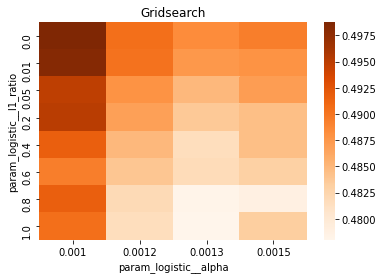

In [150]:
#Model 1(Baseline): Volatility
# Model specific Parameter 

# Number of iterations
iterations_1_b=[10] 

# Regularization  
alpha_g_1_b=[0.0010, 0.0012, 0.0013,0.0015] 
l1_ratio_g_1_b=[0, 0.01, 0.05, 0.2, 0.4, 0.6, 0.8, 1] 

# Create hyperparameter
hyperparameters_g_1_b={'logistic__alpha':alpha_g_1_b, 
                       'logistic__l1_ratio':l1_ratio_g_1_b, 
                       'logistic__penalty':regularization,  
                       'logistic__max_iter':iterations_1_b}

# Create grid search 
search_g_1_b=GridSearchCV(estimator=pipeline_b, 
                            param_grid=hyperparameters_g_1_b, 
                            cv=tscv,verbose=0, n_jobs=-1,scoring=scoring_b, refit=metric_b,return_train_score=False)

#Fit grid search
tuned_model_1_b=search_g_1_b.fit(X_train_1, y_train_1)
#search_g_1_b.cv_results_

#Cost function
print('Loss function:', tuned_model_1_b.best_estimator_.get_params()['logistic__loss'])

#Accuracy 
print(metric_b +' of the best model: ', tuned_model_1_b.best_score_);print("\n")
# best_score_ Mean cross-validated score of the best_estimator

#best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model_1_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_1_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_1_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_1_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_1_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_1_b.best_estimator_.steps[1][1].coef_[0][:]))

# Gridsearch table
plt.title('Gridsearch')
pvt_1_b=pd.pivot_table(pd.DataFrame(tuned_model_1_b.cv_results_), values='mean_test_accuracy', index='param_logistic__l1_ratio', columns='param_logistic__alpha')
ax_1_b=sns.heatmap(pvt_1_b, cmap="Oranges")
plt.show()


Accuracy: 0.4126984126984127
Precision: 0.39194139194139194
Recall: 0.8492063492063492


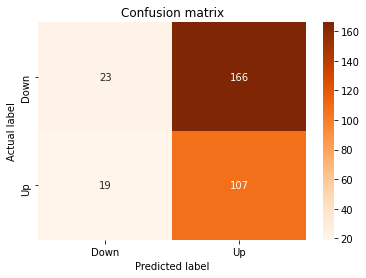

In [151]:
#Confusion Matrix
# Make predictions
y_pred_1_b=tuned_model_1_b.predict(X_test_1)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_1, y_pred_1_b)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_b))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1_b))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_b))

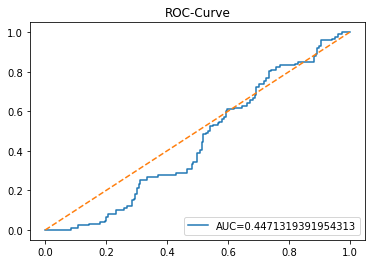

In [152]:
#ROC Curve
y_proba_1_b=tuned_model_1_b.predict_proba(X_test_1)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_1,  y_proba_1_b)
auc=metrics.roc_auc_score(y_test_1, y_proba_1_b)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.title('ROC-Curve')
plt.show()

In [153]:
def create_shallow_LSTM(epochs=1, 
                        LSTM_units=1,
                        num_samples=1, 
                        look_back=1,
                        num_features=None,  
                        dropout_rate=0,
                        recurrent_dropout=0,
                        verbose=0):
    
    model=Sequential()
    
    model.add(LSTM(units=LSTM_units, 
                   batch_input_shape=(num_samples, look_back, num_features), 
                   stateful=True, 
                   recurrent_dropout=recurrent_dropout)) 
    
    model.add(Dropout(dropout_rate))
            
    model.add(Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=1)))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    return model

In [176]:
# Define a callback class
# Resets the states after each epoch (after going through a full time series)
class ModelStateReset(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.reset_states()
reset=ModelStateReset()

In [177]:
#LSTM Model
# number of epochs
epochs=2
# number of units 
LSTM_units_1_lstm=128
# numer of features
num_features_1_lstm=X_train_1.shape[1]
# Regularization
dropout_rate=0.1
recurrent_dropout=0.1
# print
verbose=0

#hyperparameter
batch_size=[1] 

# hyperparameter
hyperparameter_1_lstm={'batch_size':batch_size}


# create Classifier
clf_1_lstm=KerasClassifier(build_fn=create_shallow_LSTM, 
                          epochs=epochs, 
                          LSTM_units=LSTM_units_1_lstm, 
                          num_samples=num_samples, 
                          look_back=look_back, 
                          num_features=num_features_1_lstm, 
                          dropout_rate=dropout_rate,
                          recurrent_dropout=recurrent_dropout,
                          verbose=verbose)
# Gridsearch
search_1_lstm=GridSearchCV(estimator=clf_1_lstm, 
                          param_grid=hyperparameter_1_lstm,  
                          n_jobs=-1,  
                          cv=tscv, 
                          scoring=scoring_lstm, # accuracy
                          refit=True, 
                          return_train_score=False)

# Fit model
tuned_model_1_lstm=search_1_lstm.fit(X_train_1_lstm, y_train_1, shuffle=False, callbacks=[reset])



print("\n")

# View Accuracy 
print(scoring_lstm +' of the best model: ', tuned_model_1_lstm.best_score_)
# best_score_ Mean cross-validated score of the best_estimator

print("\n")

# View best hyperparameters
print("Best hyperparameters:")
print('epochs:', tuned_model_1_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_1_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_1_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_1_lstm.best_estimator_.get_params()['recurrent_dropout'])




accuracy of the best model:  0.5640862944162437


Best hyperparameters:
epochs: 2
batch_size: 1
dropout_rate: 0.1
recurrent_dropout: 0.1


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.4158730158730159
Precision: 0.37280701754385964
Recall: 0.6746031746031746


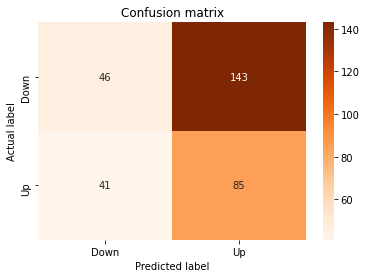

In [178]:
#Confusion Matrix
# Make predictions
y_pred_1_lstm=tuned_model_1_lstm.predict(X_test_1_lstm)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_1, y_pred_1_lstm)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_lstm))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1_lstm))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_lstm))

Instructions for updating:
Please use `model.predict()` instead.


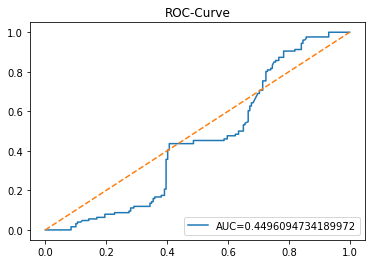

In [179]:
#ROC Curve
y_proba_1_lstm=tuned_model_1_lstm.predict_proba(X_test_1_lstm)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_1,  y_proba_1_lstm)
auc=metrics.roc_auc_score(y_test_1, y_proba_1_lstm)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Loss function: log
accuracy of the best model:  0.5215736040609137


Best hyperparameters:
Number of iterations: 10
Penalty: elasticnet
Alpha: 0.001
l1_ratio: 0.2
Total number of features: 23
Number of selected features: 20


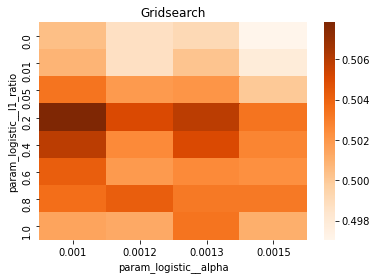

In [182]:
#Model(Baseline): Return

# Number of iterations
iterations_2_b=[10] 


# Grid Search

# Regularization  
alpha_g_2_b=[0.0010, 0.0012, 0.0013,0.0015] 
l1_ratio_g_2_b=[0, 0.01, 0.05, 0.2, 0.4, 0.6, 0.8, 1] 

# Create hyperparameter options
hyperparameters_g_2_b={'logistic__alpha':alpha_g_2_b, 
                       'logistic__l1_ratio':l1_ratio_g_2_b, 
                       'logistic__penalty':regularization,  
                       'logistic__max_iter':iterations_2_b}

# Create grid search 
search_g_2_b=GridSearchCV(estimator=pipeline_b, 
                          param_grid=hyperparameters_g_2_b, 
                          cv=tscv, 
                          verbose=0, 
                          n_jobs=-1, 
                          scoring=scoring_b, 
                          refit=metric_b, 
                          return_train_score=False)
# Fit grid search
tuned_model_2_b=search_g_2_b.fit(X_train_2, y_train_2)

# View Cost function
print('Loss function:', tuned_model_2_b.best_estimator_.get_params()['logistic__loss'])

#Accuracy 
print(metric_b +' of the best model: ', tuned_model_2_b.best_score_);print("\n")
# best_score_ Mean cross-validated score of the best_estimator

#best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model_2_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_2_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_2_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_2_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_2_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_2_b.best_estimator_.steps[1][1].coef_[0][:]))

# Gridsearch table
plt.title('Gridsearch')
pvt_2_b=pd.pivot_table(pd.DataFrame(tuned_model_2_b.cv_results_), values='mean_test_accuracy', index='param_logistic__l1_ratio', columns='param_logistic__alpha')
ax_2_b=sns.heatmap(pvt_2_b, cmap="Oranges")
plt.show()

Accuracy: 0.4222222222222222
Precision: 0.4090909090909091
Recall: 1.0


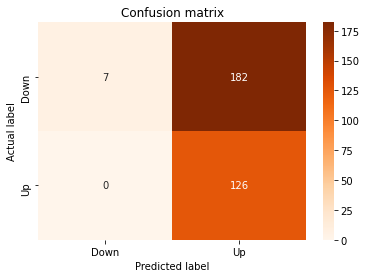

In [183]:
#Confusion Matrix
# Make predictions
y_pred_2_b=tuned_model_2_b.predict(X_test_2)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_2, y_pred_2_b)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_b))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2_b))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_b))

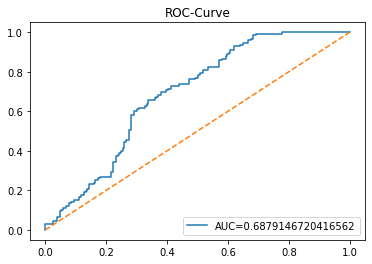

In [185]:
#ROC Curve
y_proba_2_b=tuned_model_2_b.predict_proba(X_test_2)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_2,  y_proba_2_b)
auc=metrics.roc_auc_score(y_test_2, y_proba_2_b)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.title('ROC-Curve')
plt.show()

In [187]:
# Define a callback class
# Resets the states after each epoch (after going through a full time series)
class ModelStateReset(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.reset_states()
reset=ModelStateReset()

In [188]:
#LSTM MODEL
# number of epochs
epochs=2
# number of units 
LSTM_units_2_lstm=128
# number of samples
num_samples=1 
# time_steps
look_back=1
# numer of features
num_features_2_lstm=X_train_2.shape[1]
# Regularization
dropout_rate=0.
recurrent_dropout=0.4
# print
verbose=0

#hyperparameter
batch_size=[1] 

# hyperparameter
hyperparameter_2_lstm={'batch_size':batch_size}


# create Classifier
clf_2_lstm=KerasClassifier(build_fn=create_shallow_LSTM, 
                           epochs=epochs, 
                           LSTM_units=LSTM_units_2_lstm, 
                           num_samples=num_samples, 
                           look_back=look_back, 
                           num_features=num_features_2_lstm, 
                           dropout_rate=dropout_rate,
                           recurrent_dropout=recurrent_dropout,
                           verbose=verbose)
# Gridsearch
search_2_lstm=GridSearchCV(estimator=clf_2_lstm, 
                           param_grid=hyperparameter_2_lstm,  
                           n_jobs=-1,  
                           cv=tscv, 
                           scoring=scoring_lstm, # accuracy
                           refit=True, 
                           return_train_score=False)

# Fit model
tuned_model_2_lstm=search_2_lstm.fit(X_train_2_lstm, y_train_2, shuffle=False, callbacks=[reset])



print("\n")

# View Accuracy 
print(scoring_lstm +' of the best model: ', tuned_model_2_lstm.best_score_)
# best_score_ Mean cross-validated score of the best_estimator

print("\n")

# View best hyperparameters
print("Best hyperparameters:")
print('epochs:', tuned_model_2_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_2_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_2_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_2_lstm.best_estimator_.get_params()['recurrent_dropout'])



accuracy of the best model:  0.5564720812182742


Best hyperparameters:
epochs: 2
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4


Accuracy: 0.4222222222222222
Precision: 0.4090909090909091
Recall: 1.0


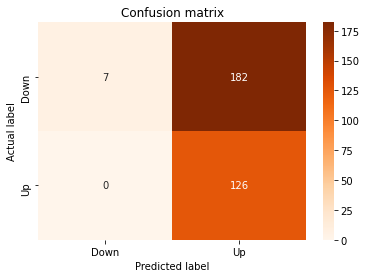

In [189]:
# Make predictions
y_pred_2_lstm=tuned_model_2_lstm.predict(X_test_2_lstm)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_2, y_pred_2_lstm)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_lstm))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2_lstm))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_lstm))

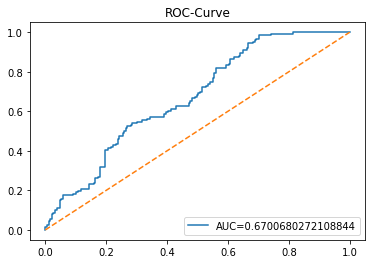

In [190]:
y_proba_2_lstm=tuned_model_2_lstm.predict_proba(X_test_2_lstm)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_2,  y_proba_2_lstm)
auc=metrics.roc_auc_score(y_test_2, y_proba_2_lstm)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Loss function: log
accuracy of the best model:  0.5741626794258373


Best hyperparameters:
Number of iterations: 10
Penalty: elasticnet
Alpha: 0.001
l1_ratio: 0.4
Total number of features: 69
Number of selected features: 37


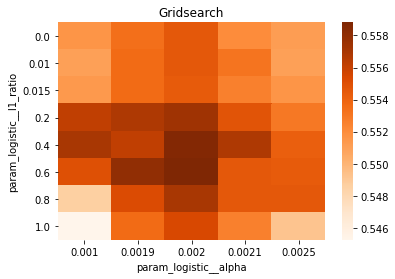

In [191]:
#Model 7, Volatility, Return and Trading Volume
# Model specific Parameter 

# Number of iterations
iterations_7_b=[10] 


# Grid Search

# Regularization  
alpha_g_7_b=[0.0010, 0.0019, 0.002, 0.0021, 0.0025] 
l1_ratio_g_7_b=[0,0.01, 0.015, 0.2, 0.4, 0.6, 0.8, 1] 

# Create hyperparameter options
hyperparameters_g_7_b={'logistic__alpha':alpha_g_7_b, 
                       'logistic__l1_ratio':l1_ratio_g_7_b, 
                       'logistic__penalty':regularization,  
                       'logistic__max_iter':iterations_7_b}

# Create grid search 
search_g_7_b=GridSearchCV(estimator=pipeline_b, 
                          param_grid=hyperparameters_g_7_b, 
                          cv=tscv, 
                          verbose=0, 
                          n_jobs=-1, 
                          scoring=scoring_b, 
                          refit=metric_b, 
                          return_train_score=False)

# Fit grid search
tuned_model_7_b=search_g_7_b.fit(X_train_7, y_train_7)
# View Cost function
print('Loss function:', tuned_model_7_b.best_estimator_.get_params()['logistic__loss'])

#Accuracy 
print(metric_b +' of the best model: ', tuned_model_7_b.best_score_);print("\n")
# best_score_ Mean cross-validated score of the best_estimator

#best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model_7_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_7_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_7_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_7_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_7_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_7_b.best_estimator_.steps[1][1].coef_[0][:]))

# Gridsearch table
plt.title('Gridsearch')
pvt_7_b=pd.pivot_table(pd.DataFrame(tuned_model_7_b.cv_results_), values='mean_test_accuracy', index='param_logistic__l1_ratio', columns='param_logistic__alpha')
ax_7_b=sns.heatmap(pvt_7_b, cmap="Oranges")
plt.show()

Accuracy: 0.4523809523809524
Precision: 0.4205128205128205
Recall: 0.9761904761904762


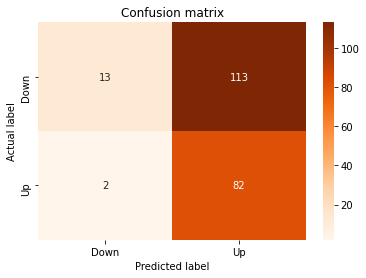

In [192]:
# Make predictions
y_pred_7_b=tuned_model_7_b.predict(X_test_7)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_7, y_pred_7_b)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_7, y_pred_7_b))
print("Precision:",metrics.precision_score(y_test_7, y_pred_7_b))
print("Recall:",metrics.recall_score(y_test_7, y_pred_7_b))

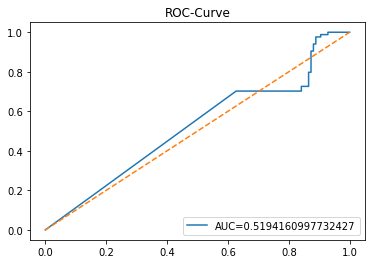

In [193]:
y_proba_7_b=tuned_model_7_b.predict_proba(X_test_7)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_7,  y_proba_7_b)
auc=metrics.roc_auc_score(y_test_7, y_proba_7_b)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

In [194]:
class ModelStateReset(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.reset_states()
reset=ModelStateReset()

In [195]:
#LSTM
# number of epochs
epochs=2
# number of units 
LSTM_units_7_lstm=128
# numer of features
num_features_7_lstm=X_train_7.shape[1]
# Regularization
dropout_rate=0.
recurrent_dropout=0.4
# print
verbose=0

#hyperparameter
batch_size=[1] 

# hyperparameter
hyperparameter_7_lstm={'batch_size':batch_size}


# create Classifier
clf_7_lstm=KerasClassifier(build_fn=create_shallow_LSTM, 
                           epochs=epochs, 
                           LSTM_units=LSTM_units_7_lstm, 
                           num_samples=num_samples, 
                           look_back=look_back, 
                           num_features=num_features_7_lstm, 
                           dropout_rate=dropout_rate,
                           recurrent_dropout=recurrent_dropout,
                           verbose=verbose)
# Gridsearch
search_7_lstm=GridSearchCV(estimator=clf_7_lstm, 
                           param_grid=hyperparameter_7_lstm,  
                           n_jobs=-1,  
                           cv=tscv, 
                           scoring=scoring_lstm, # accuracy
                           refit=True, 
                           return_train_score=False)

# Fit model
tuned_model_7_lstm=search_7_lstm.fit(X_train_7_lstm, y_train_7, shuffle=False, callbacks=[reset])



print("\n")

# View Accuracy 
print(scoring_lstm +' of the best model: ', tuned_model_7_lstm.best_score_)
# best_score_ Mean cross-validated score of the best_estimator

print("\n")

# View best hyperparameters
print("Best hyperparameters:")
print('epochs:', tuned_model_7_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_7_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_7_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_7_lstm.best_estimator_.get_params()['recurrent_dropout'])

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning




accuracy of the best model:  0.5316985645933014


Best hyperparameters:
epochs: 2
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4


Accuracy: 0.4857142857142857
Precision: 0.4268292682926829
Recall: 0.8333333333333334


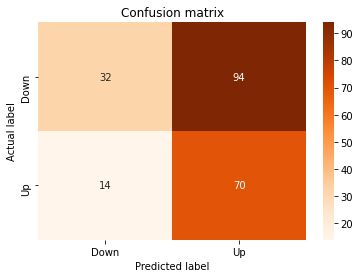

In [196]:
# Make predictions
y_pred_7_lstm=tuned_model_7_lstm.predict(X_test_7_lstm)

# create confustion matrix
fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_7, y_pred_7_lstm)), annot=True, cmap="Oranges" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])

print("Accuracy:",metrics.accuracy_score(y_test_7, y_pred_7_lstm))
print("Precision:",metrics.precision_score(y_test_7, y_pred_7_lstm))
print("Recall:",metrics.recall_score(y_test_7, y_pred_7_lstm))

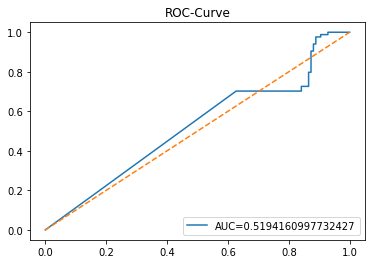

In [197]:
y_proba_7_b=tuned_model_7_b.predict_proba(X_test_7)[:, 1]
fpr, tpr, _=metrics.roc_curve(y_test_7,  y_proba_7_b)
auc=metrics.roc_auc_score(y_test_7, y_proba_7_b)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()